# 一、导入所需要的包

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from math import *

# 二、梯度下降法

In [2]:
def obj_fun(x:np.mat):
    r_vect=np.zeros(x.shape)
    t=np.zeros(x.shape)
    y=np.zeros(x.shape)
    for i in range(len(r_vect)):
        t[i]=0.1*(i+1)
    for i in range(len(r_vect)):
        y[i]=exp(-t[i])-5*exp(-10*t[i])+3*exp(-4*t[i])
    for i in range(len(r_vect)):
        r_vect[i]=x[2]*exp(-t[i]*x[0])-x[3]*exp(-t[i]*x[1])+x[5]*exp(-t[i]*x[4])-y[i]
    #print('r_vect',r_vect)
    obj_val=float(sum(np.power(r_vect,2)))
    #print('obj_val',np.power(r_vect,2))
    return obj_val

def grad_fun(x:np.mat):
    n = len(x)
    r_mat=np.zeros(x.shape)
    r_vect=np.zeros(x.shape)
    t=np.zeros(x.shape)
    y=np.zeros(x.shape)
    for i in range(len(r_vect)):
        t[i]=0.1*(i+1)
    for i in range(len(r_vect)):
        y[i]=exp(-t[i])-5*exp(-10*t[i])+3*exp(-4*t[i])
    for i in range(len(r_vect)):
        r_vect[i]=x[2]*exp(-t[i]*x[0])-x[3]*exp(-t[i]*x[1])+x[5]*exp(-t[i]*x[4])-y[i]
    x1=0
    x2=0
    x3=0
    x4=0
    x5=0
    x6=0
    for i in range(len(r_vect)):
        x1=x1+(-2*t[i]*x[2]*r_vect[i]*exp(-t[i]*x[0]))
        x2=x2+(2*t[i]*x[3]*r_vect[i]*exp(-t[i]*x[1]))
        x3=x3+(2*r_vect[i]*exp(-t[i]*x[0]))
        x4=x4+(-2*r_vect[i]*exp(-t[i]*x[1]))
        x5=x5+(-2*r_vect[i]*t[i]*x[5]*exp(-t[i]*x[4]))
        x6=x6+2*r_vect[i]*exp(-t[i]*x[4])
    r_mat[0]=x1
    r_mat[1]=x2
    r_mat[2]=x3
    r_mat[3]=x4
    r_mat[4]=x5
    r_mat[5]=x6
    #grad_vect = r_mat.reshape(r_mat.shape[0],1)
    grad_vect=r_mat
    return grad_vect



In [3]:
f_common=[]
f_momentum=[]
f_RMSProp=[]
f_AdaGrad=[]

In [4]:
def common_gradient(x):
    k=0
    flag=True
    x0=x
    alpha=0.25
    f1=obj_fun(x0)
    f2=-obj_fun(x0)
    while flag:
        
        if k==4000:
            flag=False
        else:
            f2=f1
            dk=-grad_fun(x0)
            f_common.append(obj_fun(x0))
            #print('g',grad_fun(x0))
            x0=x0+dk*alpha
            f1=obj_fun(x0)
            k=k+1
    return x0,k,obj_fun(x0)
D=np.array([1,2,1,1,1,1])
#M=D.reshape(D.shape[0],1)
print(common_gradient(D))

(array([ 8.98094087,  2.44472101, -2.03301402, -3.49659165,  8.98094087,
       -2.03301402]), 4000, 0.001331350708330476)


In [5]:
def momentum(x):
    k=0
    flag=True
    x0=x
    alpha=0.26
    sum_gradient=0
    eps=0.8
    while flag:
        if k==4000:
            flag=False
        else:
            dk=-grad_fun(x0) 
            f_momentum.append(obj_fun(x0))
            sum_gradient=dk+sum_gradient*eps
            #print('sum_gradient',sum_gradient)
            x0=x0+alpha*sum_gradient
            #print('f',obj_fun(x0))
            k=k+1
    return x0,k,obj_fun(x0)

D=np.array([1,2,1,1,1,1])
#M=D.reshape(D.shape[0],1)
print(momentum(D))    

(array([12.77169698,  2.01416062, -2.04014348, -2.7076098 , 12.77169698,
       -2.04014348]), 4000, 3.978977944658186e-05)


In [6]:
def RMSProp(x):
    k=0
    flag=True
    x0=x
    alpha=0.0001
    v0=0
    p=0.9
    while flag:
        if k==4000:
            flag=False
        else:
            f_RMSProp.append(obj_fun(x0))
            g=grad_fun(x0) 
            v=p*v0+(1-p)*(g*g)
            a=alpha/(v+1e-20)
            x0=x0-g*a
            #print('f',obj_fun(x0))
            v0=v
            k=k+1
    return x0,k,obj_fun(x0)
D=np.array([1,2,1,1,1,1])
#M=D.reshape(D.shape[0],1)
print(RMSProp(D))    

(array([2.62190187, 8.21060039, 1.95165905, 4.3840574 , 2.62190187,
       1.95165905]), 4000, 0.0021871541675546314)


In [7]:
def AdaGrad(x):
    k=0
    flag=True
    x0=x
    alpha=1
    sum_g=0
    while flag:
        if k==4000:
            flag=False
        else:
            f_AdaGrad.append(obj_fun(x0))
            g=grad_fun(x0) 
            sum_g=sum_g+g*g
            x0=x0-(alpha/(sum_g**0.5+1e-10))*g
            #print('f',obj_fun(x0))
            k=k+1
            
    return x0,k,obj_fun(x0)        
    
    
D=np.array([1,2,1,1,1,1])
#M=D.reshape(D.shape[0],1)
print(AdaGrad(D))       

(array([ 2.02341265, 12.34209209,  1.3647171 ,  3.95105459,  2.02341265,
        1.3647171 ]), 4000, 8.575535252550698e-05)


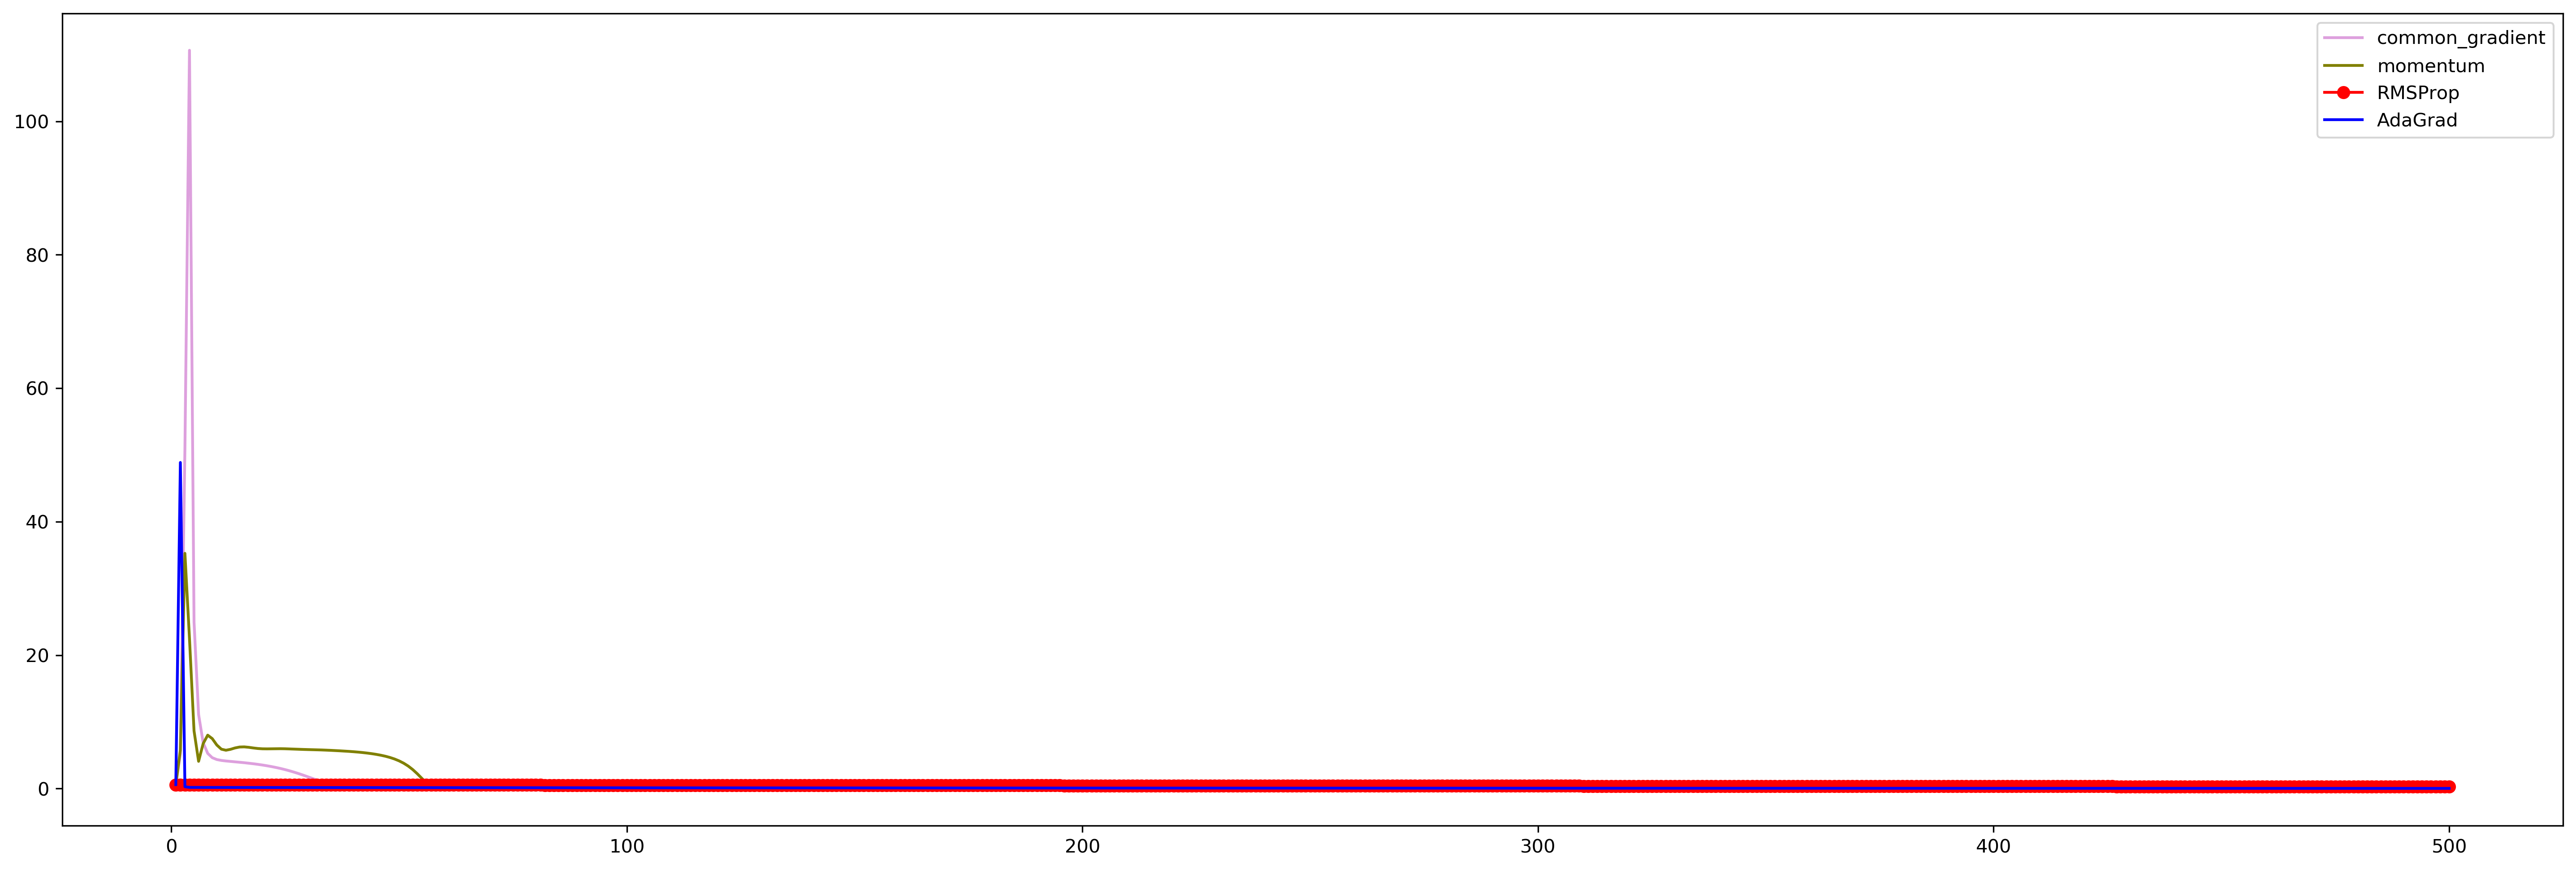

In [9]:
kk2=[]
f_common2=[]
f_momentum2=[]
f_RMSProp2=[]
f_AdaGrad2=[]
for i in range(1,501):
    kk2.append(i)
    f_common2.append(f_common[i-1])
    f_momentum2.append(f_momentum[i-1])
    f_RMSProp2.append(f_RMSProp[i-1])
    f_AdaGrad2.append(f_AdaGrad[i-1])
plt.figure(dpi=300,figsize=(24,8))
plt.plot(kk2,f_common2,color='plum',label='common_gradient')
plt.plot(kk2,f_momentum2,color='olive',label='momentum')
plt.plot(kk2,f_RMSProp2,color='r',label='RMSProp',marker='o')
plt.plot(kk2,f_AdaGrad2,color='blue',label='AdaGrad')
plt.legend()
plt.show()

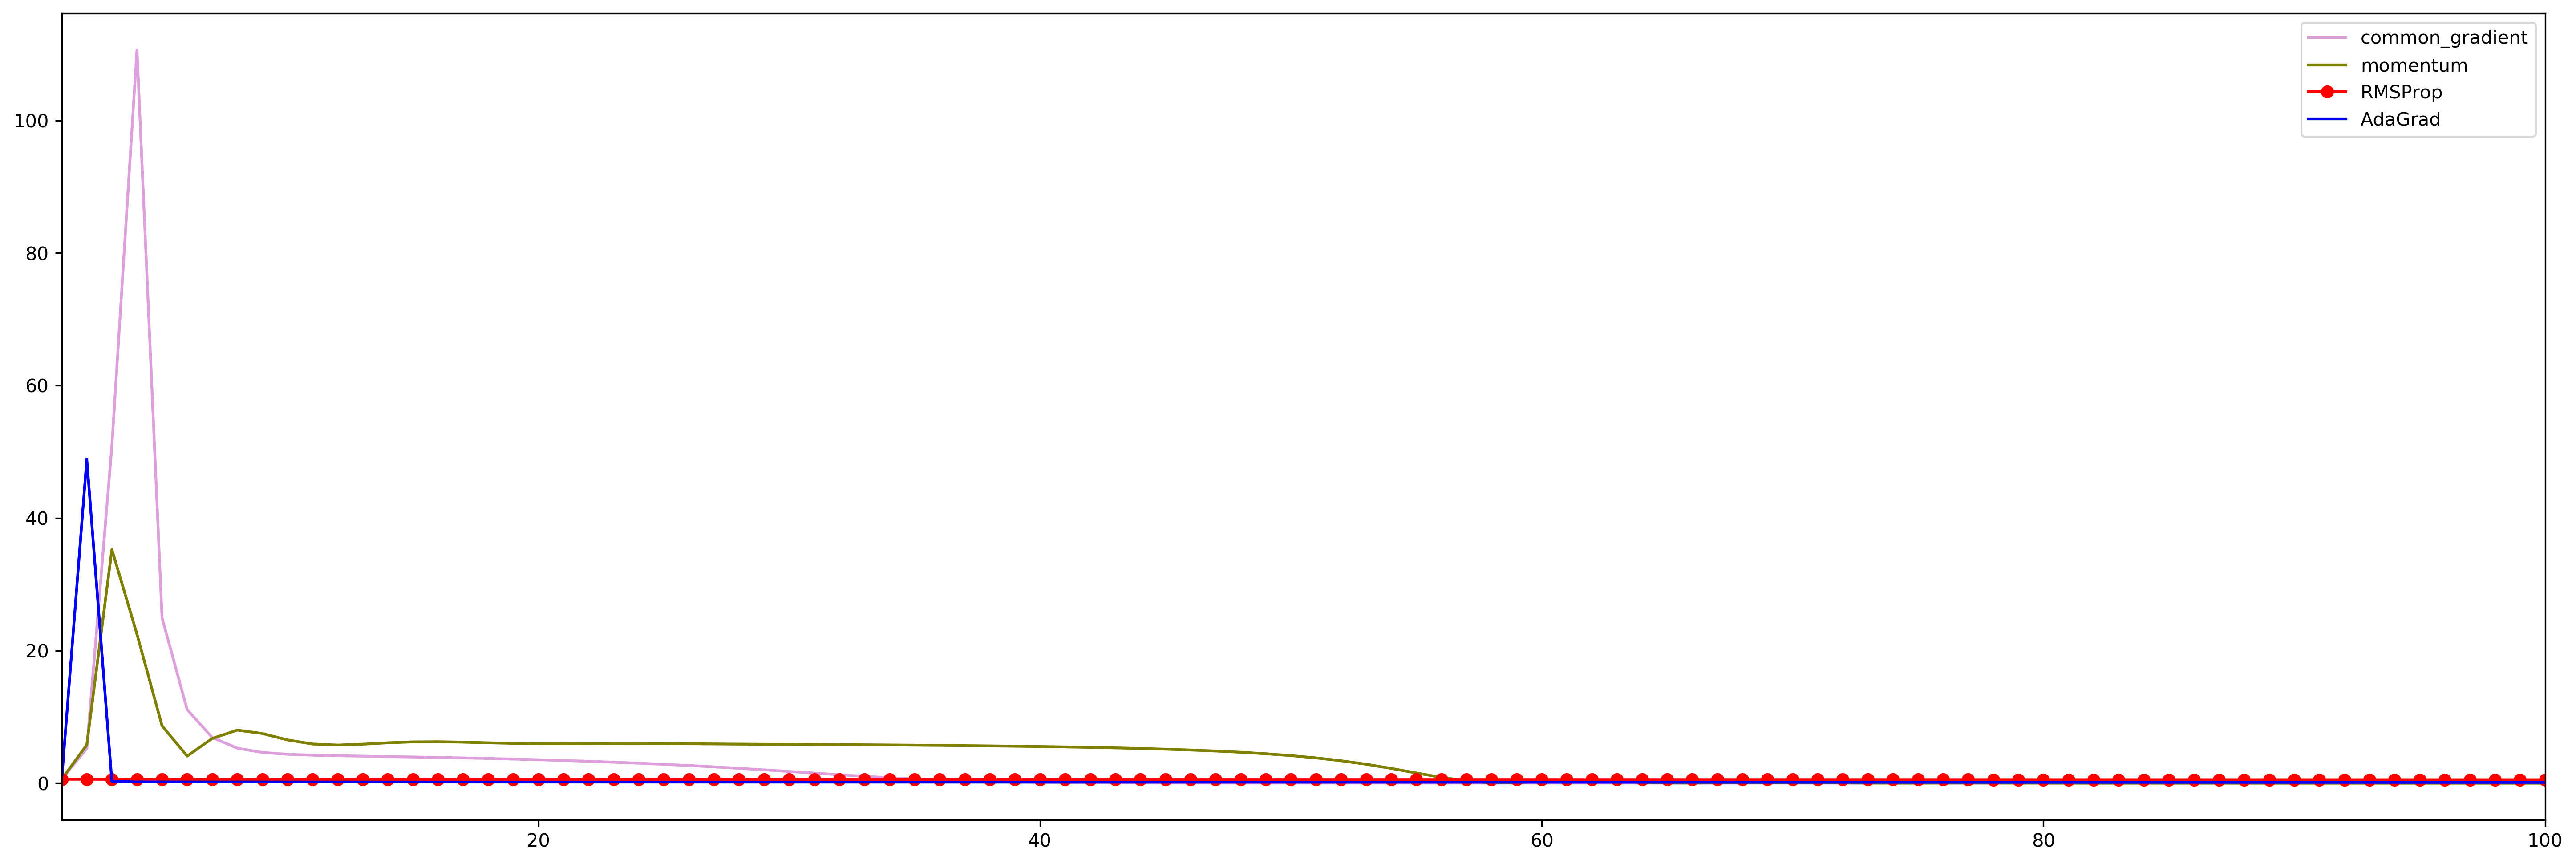

In [10]:
kk2=[]
f_common2=[]
f_momentum2=[]
f_RMSProp2=[]
f_AdaGrad2=[]
for i in range(1,101):
    kk2.append(i)
    f_common2.append(f_common[i-1])
    f_momentum2.append(f_momentum[i-1])
    f_RMSProp2.append(f_RMSProp[i-1])
    f_AdaGrad2.append(f_AdaGrad[i-1])
plt.figure(dpi=300,figsize=(24,8))
plt.plot(kk2,f_common2,color='plum',label='common_gradient')
plt.plot(kk2,f_momentum2,color='olive',label='momentum')
plt.plot(kk2,f_RMSProp2,color='r',label='RMSProp',marker='o')
plt.plot(kk2,f_AdaGrad2,color='blue',label='AdaGrad')
plt.margins(x=0)
plt.legend()
plt.show()

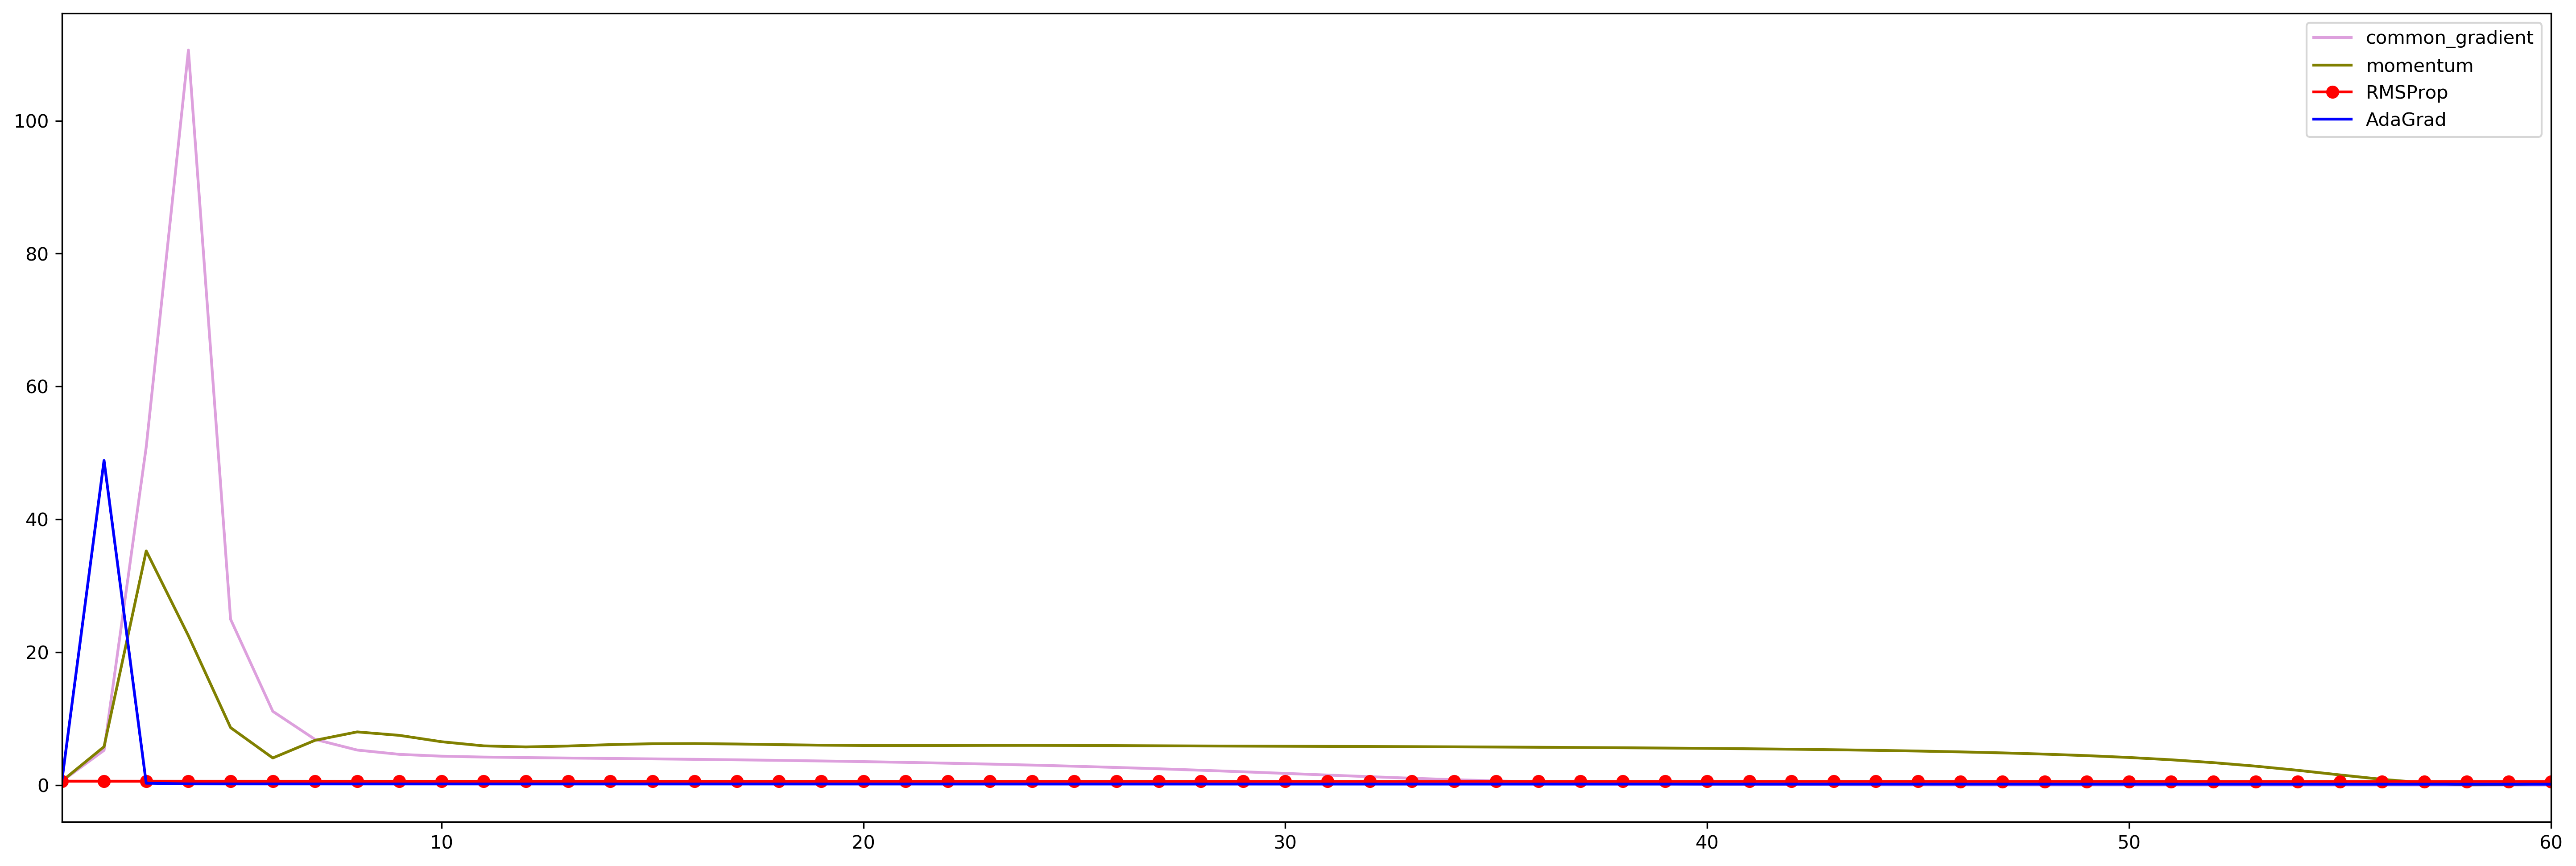

In [11]:
kk2=[]
f_common2=[]
f_momentum2=[]
f_RMSProp2=[]
f_AdaGrad2=[]
for i in range(1,61):
    kk2.append(i)
    f_common2.append(f_common[i-1])
    f_momentum2.append(f_momentum[i-1])
    f_RMSProp2.append(f_RMSProp[i-1])
    f_AdaGrad2.append(f_AdaGrad[i-1])
plt.figure(dpi=300,figsize=(24,8))
plt.plot(kk2,f_common2,color='plum',label='common_gradient')
plt.plot(kk2,f_momentum2,color='olive',label='momentum')
plt.plot(kk2,f_RMSProp2,color='r',label='RMSProp',marker='o')
plt.plot(kk2,f_AdaGrad2,color='blue',label='AdaGrad')
plt.margins(x=0)
plt.legend()
plt.show()